In [1]:
from dataset import load_data

dataloader = load_data(train=True, batch_size=2, num_workers=1)

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 167.24it/s]


In [2]:
dataloader.dataset[0]

(tensor([[[0.8941, 0.8863, 0.8667,  ..., 0.8431, 0.8471, 0.8824],
          [0.8706, 0.8863, 0.8902,  ..., 0.8431, 0.8471, 0.8745],
          [0.9020, 0.9098, 0.8667,  ..., 0.8431, 0.8431, 0.8667],
          ...,
          [0.7412, 0.7686, 0.8275,  ..., 0.6627, 0.6667, 0.6941],
          [0.7373, 0.7647, 0.7804,  ..., 0.7373, 0.7373, 0.6941],
          [0.7294, 0.7373, 0.7373,  ..., 0.7451, 0.7451, 0.6980]],
 
         [[0.8980, 0.8902, 0.8667,  ..., 0.8471, 0.8510, 0.8863],
          [0.8745, 0.8902, 0.8902,  ..., 0.8471, 0.8510, 0.8784],
          [0.9059, 0.9137, 0.8667,  ..., 0.8471, 0.8471, 0.8706],
          ...,
          [0.7529, 0.7804, 0.8392,  ..., 0.6706, 0.6745, 0.7020],
          [0.7490, 0.7765, 0.7922,  ..., 0.7451, 0.7451, 0.7020],
          [0.7412, 0.7490, 0.7490,  ..., 0.7529, 0.7529, 0.7059]],
 
         [[0.7412, 0.7333, 0.7176,  ..., 0.6902, 0.6863, 0.7137],
          [0.7176, 0.7333, 0.7412,  ..., 0.6902, 0.6863, 0.7059],
          [0.7490, 0.7569, 0.7176,  ...,

In [3]:
for batch in dataloader:
    images, targets, idxs = batch

    if len(targets[0]['labels']) >= 1:
        print(f"images.shape: {images.shape}, idx: {idxs}")
        print(images)
        print(targets)
        break

images.shape: torch.Size([1, 3, 1066, 800]), idx: [1302783]
tensor([[[[0.8941, 0.8863, 0.8667,  ..., 0.8431, 0.8471, 0.8824],
          [0.8706, 0.8863, 0.8902,  ..., 0.8431, 0.8471, 0.8745],
          [0.9020, 0.9098, 0.8667,  ..., 0.8431, 0.8431, 0.8667],
          ...,
          [0.7412, 0.7686, 0.8275,  ..., 0.6627, 0.6667, 0.6941],
          [0.7373, 0.7647, 0.7804,  ..., 0.7373, 0.7373, 0.6941],
          [0.7294, 0.7373, 0.7373,  ..., 0.7451, 0.7451, 0.6980]],

         [[0.8980, 0.8902, 0.8667,  ..., 0.8471, 0.8510, 0.8863],
          [0.8745, 0.8902, 0.8902,  ..., 0.8471, 0.8510, 0.8784],
          [0.9059, 0.9137, 0.8667,  ..., 0.8471, 0.8471, 0.8706],
          ...,
          [0.7529, 0.7804, 0.8392,  ..., 0.6706, 0.6745, 0.7020],
          [0.7490, 0.7765, 0.7922,  ..., 0.7451, 0.7451, 0.7020],
          [0.7412, 0.7490, 0.7490,  ..., 0.7529, 0.7529, 0.7059]],

         [[0.7412, 0.7333, 0.7176,  ..., 0.6902, 0.6863, 0.7137],
          [0.7176, 0.7333, 0.7412,  ..., 0.6902,

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def show_sample(img, target):
    plt.imshow(img.permute(1, 2, 0))  # permute to change CxHxW to HxWxC
    for box, mask in zip(target['boxes'], target['masks']):
        plt.imshow(mask, alpha=0.5)  # Show mask
        rect = plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], fill=False, color='red')
        plt.gca().add_patch(rect)
    plt.show()

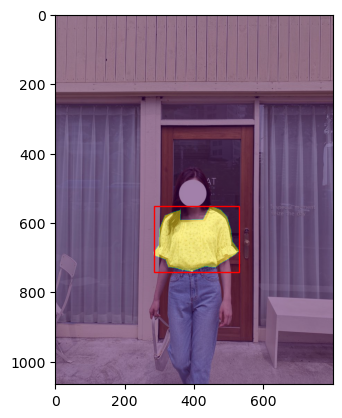

[1302783]


In [5]:
# Assuming img and target are your batch outputs
img, target, idx = next(iter(dataloader))  # Load a batch
show_sample(img[0], target[0])  # Visualize first item in the batch
print(idx)

In [6]:
target

[{'boxes': tensor([[283.1120, 550.5050, 528.1120, 740.5050]]),
  'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           ...,
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8),
  'labels': tensor([1])}]